# Exploring Mental Health Data - Kaggle Dataset

This notebook covers the exploratory data analysis and model builds for the Kaggle playground series - Exploring Mental Health Data. This is a synthetic data set that provides information relating to depression. This is a binary classification problem that classifies 1 if the individual has depression and 0 if not. 

The models that will be covered:
* K-nearest neighbours
* Elastic Net Model
* Random Forest
* Boosted Tree
* Neural Networks

However, first we need to perform EDA on the data to understand the relationships and identify if there are any issues with the data.

## Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopandas.tools import geocode

In [6]:
df = pd.read_csv('Data/train.csv')
df.head()




,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [7]:
row_nan = df.isnull().sum()
row_nan

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [8]:
df['Depression'].mean()

np.float64(0.18171286425017769)

There could be some class imbalance.

### Sex

Lets investigate whether sex is a indicator for depression

,Depression
Gender,
Female,0.178237
Male,0.184550


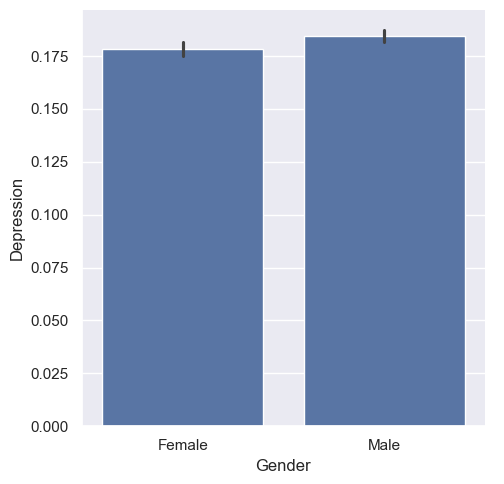

In [9]:
sns.set_theme()
sns.catplot(x='Gender', y='Depression', data=df, kind='bar')

# as a table

df[['Gender', 'Depression']].groupby('Gender').mean()


Being male slightly increases your likelihood of having depression.

## Age

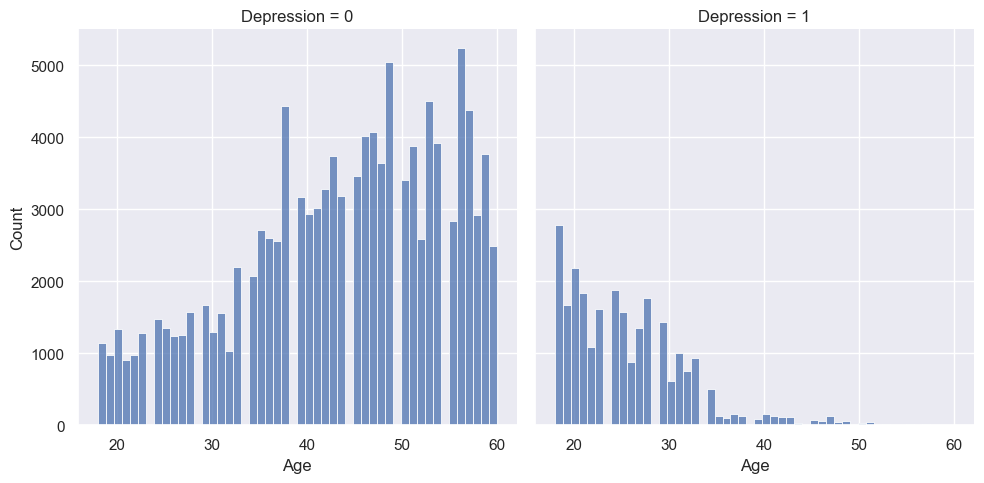

In [10]:
sns.displot(df, x = 'Age', col = 'Depression')

Age seems to be a useful variable in determining depression. The distribution looks skewed to the left with a younger population.

## City

In [11]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

There seems to be something weird going on with the city variable and needs cleaning. Something interesting would be to turn this into lat and lon so that distance and regions can be used int he model.

In [12]:
df['City'] = df['City'].replace('City', 'Kalyan')
df['City'] = df['City'].replace('3.0', 'Kalyan')
df['City'] = df['City'].replace('Less than 5 Kalyan', 'Kalyan')
df['City'] = df['City'].replace('Researcher', 'Kalyan')
df['City'] = df['City'].replace('No', 'Kalyan')
df['City'] = df['City'].replace('M.Com', 'Kalyan')
df['City'] = df['City'].replace('M.Tech', 'Kalyan')
df['City'] = df['City'].replace('Less Delhi', 'Delhi')



In [13]:
df[['City', 'Depression']].groupby('City').mean()

,Depression
City,
Aaradhya,0.000000
Aditya,0.000000
Agra,0.192357
Ahmedabad,0.217887
Aishwarya,0.000000
...,...
Varanasi,0.142206
Vasai-Virar,0.197918
Vidhi,0.000000


## Working Professional

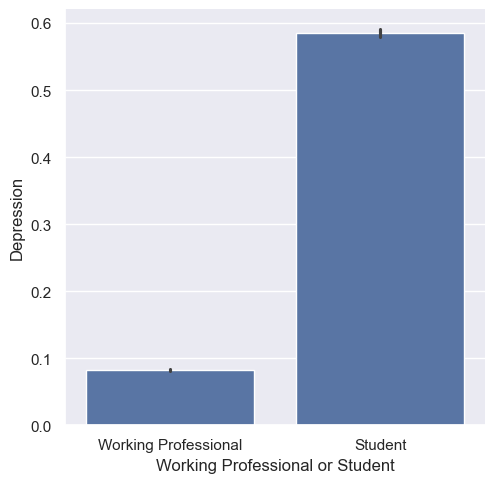

In [14]:
sns.catplot(x='Working Professional or Student', y='Depression', data=df, kind='bar')

## Profession

This dataset has some missing values, most of them are students however

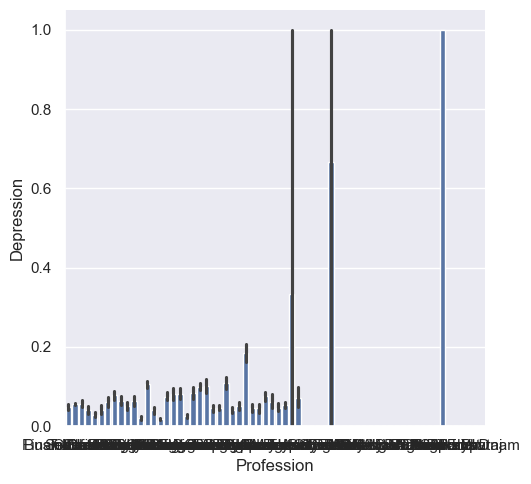

In [15]:
sns.catplot(x='Profession', y='Depression', data=df, kind='bar')

In [16]:
df[['Profession', 'Depression']].groupby('Profession').mean()

,Depression
Profession,
Academic,0.000000
Accountant,0.064227
Analyst,0.000000
Architect,0.099085
B.Com,0.000000
...,...
Unveil,0.000000
Visakhapatnam,0.000000
Working Professional,0.000000


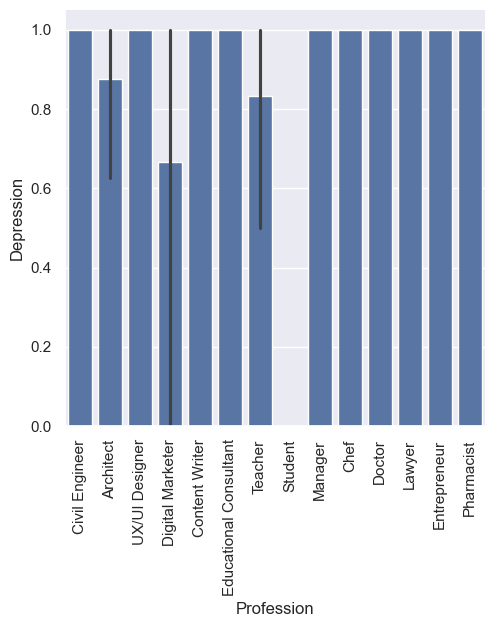

In [21]:
# Lets filter the data to only those who are students

df_students = df[df['Working Professional or Student'] == 'Student']

fig = sns.catplot(x='Profession', y='Depression', data=df_students, kind='bar')

fig.set_xticklabels(rotation=90)

In [22]:
# Lets get an initial model up and running, lets impute the data with the mode

df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Profession'].unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'

# Model Building

## Random Forest

Lets firstly build a random forest as its a easy model to get started with.

In [23]:
# Declare feature vector and target variable

X = df.drop(['Depression'], axis=1)

y = df['Depression']

In [24]:
# Split data into separate training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((112560, 19), (28140, 19))

In [25]:
X_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
dtype: object

In [27]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Name', 'Gender', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'City','Degree','Have you ever has suicidal thoughts ?','Family History of Mental Illness'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

ValueError: X does not contain the columns listed in cols